# Study Summary

目標: 瞭解利用Pandas整理資料，利用資料視覺化，可以很快判斷機器學習前的資料

載入資料後的前處理

載入資料後的前處理
1. 載入dataset
2. 觀察資料
3. 檢查重複數據
4. 移除重複的列
5. 檢查遺失值
6. 合併兩個dataset，且轉為csv並下載
7. 視覺化_直方圖

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

1. 載入dataset

In [65]:
df_white = pd.read_csv(r'./winequality\winequality-white.csv', sep = ';')
df_red = pd.read_csv(r'./winequality\winequality-red.csv', sep = ';')

2. 觀察資料

In [66]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [67]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [68]:
df_white.info(),df_red.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column        

(None, None)

3. 檢查重複數據

In [69]:
df_white.duplicated().sum(), df_red.duplicated().sum()

(937, 240)

4. 移除重複的列

In [70]:
df_white.drop_duplicates(inplace = True)
df_red.drop_duplicates(inplace = True)

5. 檢查遺失值

In [71]:
df_white.isnull().sum().sum(), df_red.isnull().sum().sum()

(0, 0)

6. 合併兩個dataset，且轉為csv並下載

In [72]:
df_wine = df_white.append(df_red)
df_wine.to_csv(r"./winequality\winequality.csv", index = False)

C:\Users\user\AppData\Local\Temp\ipykernel_20496\3681628051.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_wine = df_white.append(df_red)


In [73]:
df_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
6,6.2,0.320,0.16,7.0,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


7. 視覺化_直方圖

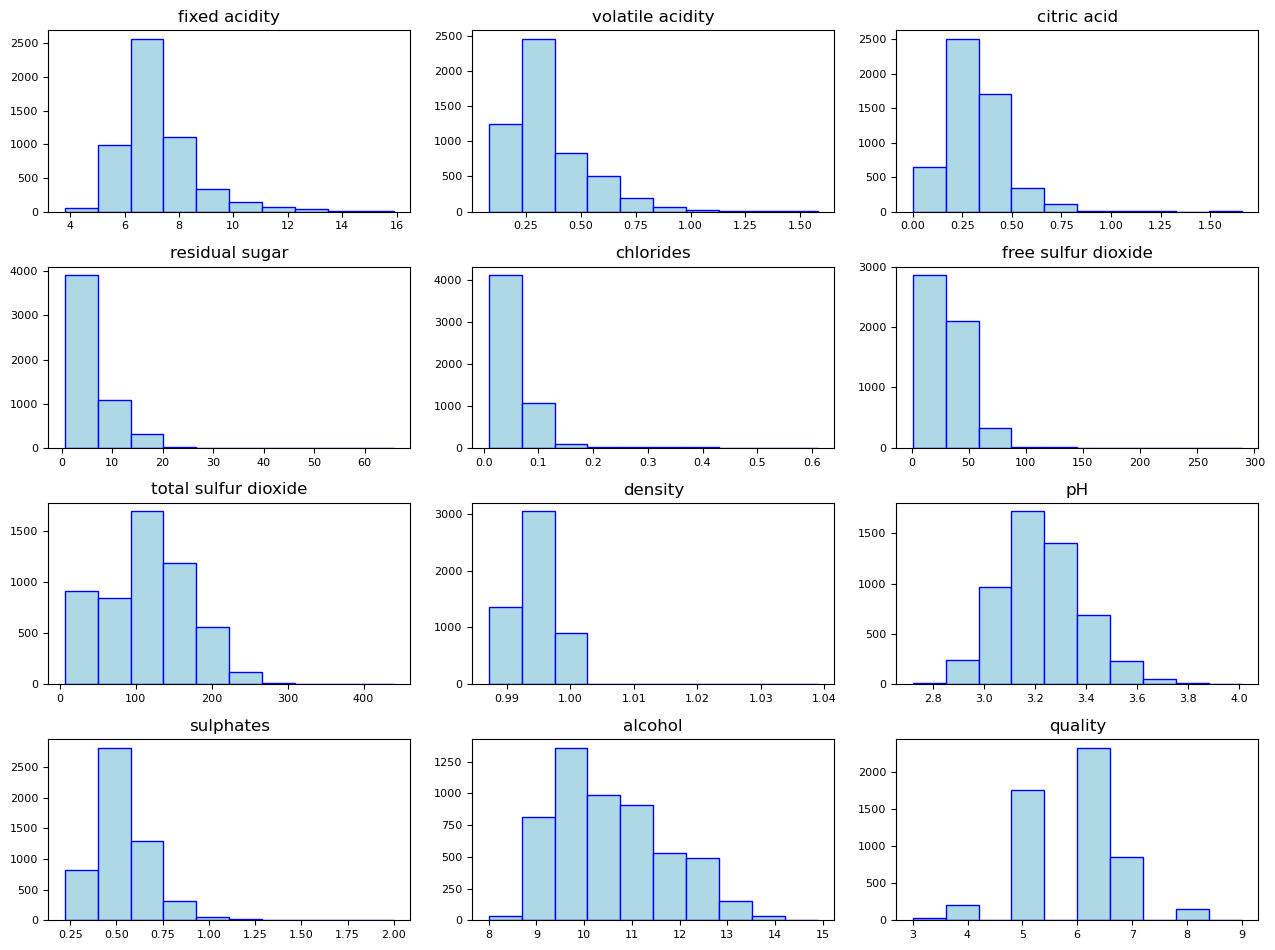

In [49]:
df_wine.hist(bins = 10, color = 'lightblue', edgecolor = 'blue', 
             xlabelsize = 8, ylabelsize = 8, grid = False)
plt.tight_layout(rect = (1,1,3,3))

補充: 
tight_layout
tight_layout()        更改 Matplotlib 子圖大小和間距
plt.subplots_adjust() 更改 Matplotlib 子圖間距
plt.subplot_tool()    更改 Matplotlib 子圖大小和間距
網址: https://www.delftstack.com/zh-tw/howto/matplotlib/how-to-improve-subplot-size-or-spacing-with-many-subplots-in-matplotlib/

plt.tight_layout(rect = ())
rect = tuple (left, bottom, right, top), default: (0, 0, 1, 1)

7. 視覺化_熱力圖
   看兩個features的關係

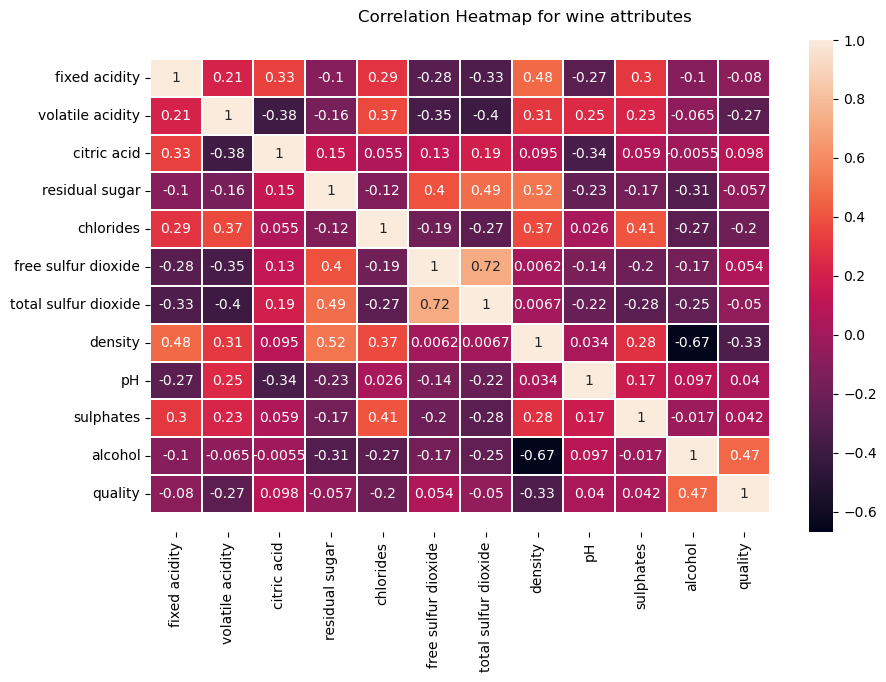

In [61]:
f, ax = plt.subplots(figsize = (10, 6))
b = sns.heatmap(df_wine.corr(), annot = True, linewidths = 0.05, ax = ax)
f.subplots_adjust(top = 0.93)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
title = f.suptitle("Correlation Heatmap for wine attributes", fontsize = 12)

8. 聯合圖
聯合圖用於顯示兩個變數之間的關係。您可以選擇從 5 個選項中繪製的繪圖種類 - 散點、reg、十六進位、kde、resid。下面我展示了三個使用線性回歸線('reg'的例子)

第一個示例"檸檬酸"和"固定酸度"具有正相關關係,因此圖形是向上的。
然而,硫酸鹽和酒精的變數是相關的。因此,線性回歸線幾乎是平的。
具有"揮發性酸度"和"檸檬酸"屬性的示例具有負相關性,因此圖呈向下。

In [ ]:
sns.jointplot(data=df_wine, x="fixed acidity", y="volatile acidity", kind = 'reg')

In [ ]:
#Plotting Jointplot, 使用 'reg'== regression 回歸線繪製關係圖
a = sns.jointplot("fixed acidity","citric acid",data = df_wine,kind ='reg', color = None)
b = sns.jointplot("alcohol", "citric acid", data = df_wine, kind = 'reg')
c = sns.jointplot("volatile acidity", "citric acid", data = df_wine, kind = 'reg')

9. 小提琴圖

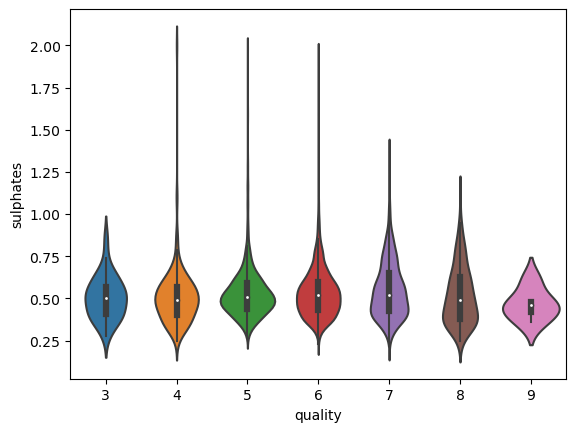

In [79]:
ax = sns.violinplot(x="quality", y="sulphates", data=df_wine)

# Homework

(1) 繪製 SWARM 
(2) 繪製 FaceGrid

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

(1) 繪製 SWARM

In [117]:
#讀取csv資料
df_red = pd.read_csv("./winequality/winequality-red.csv", sep =";")
df_white = pd.read_csv("./winequality/winequality-white.csv", sep =";")

In [127]:
#增加欄位
df_red["color"] = "R"
df_white["color"] = "W"

#整合白酒紅酒資料
df_all = pd.concat([df_white, df_red], axis = 0)

#檢查合併後的dataset
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W


In [128]:
#處理遺失值
df = pd.get_dummies(df_all, columns = ['color'])
df_all.isnull().sum().sum()

0

In [129]:
#檢查重複值、移除重複值
df_all.duplicated().sum()

1177

In [130]:
df_all.drop_duplicates(inplace = True)

In [131]:
df_all.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,W
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,W
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,W
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,W
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6,W


C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 54.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 90.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 92.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 82.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 37.8% of the points cann

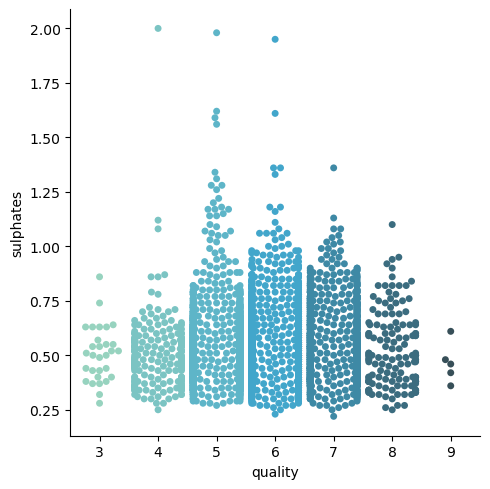

In [133]:
#用catplot設定多維度圖形
p = sns.catplot (x = "quality", y = "sulphates", 
                 kind = "swarm", data = df_all, palette = "GnBu_d")

(2) 繪製 FaceGrid
    比較兩個features間的相關性

C:\Users\user\anaconda3\lib\site-packages\seaborn\_core.py:1057: FutureWarning: reindexing with a non-unique Index is deprecated and will raise in a future version.
  comp_col.loc[orig.index] = pd.to_numeric(axis.convert_units(orig))


ValueError: cannot reindex on an axis with duplicate labels

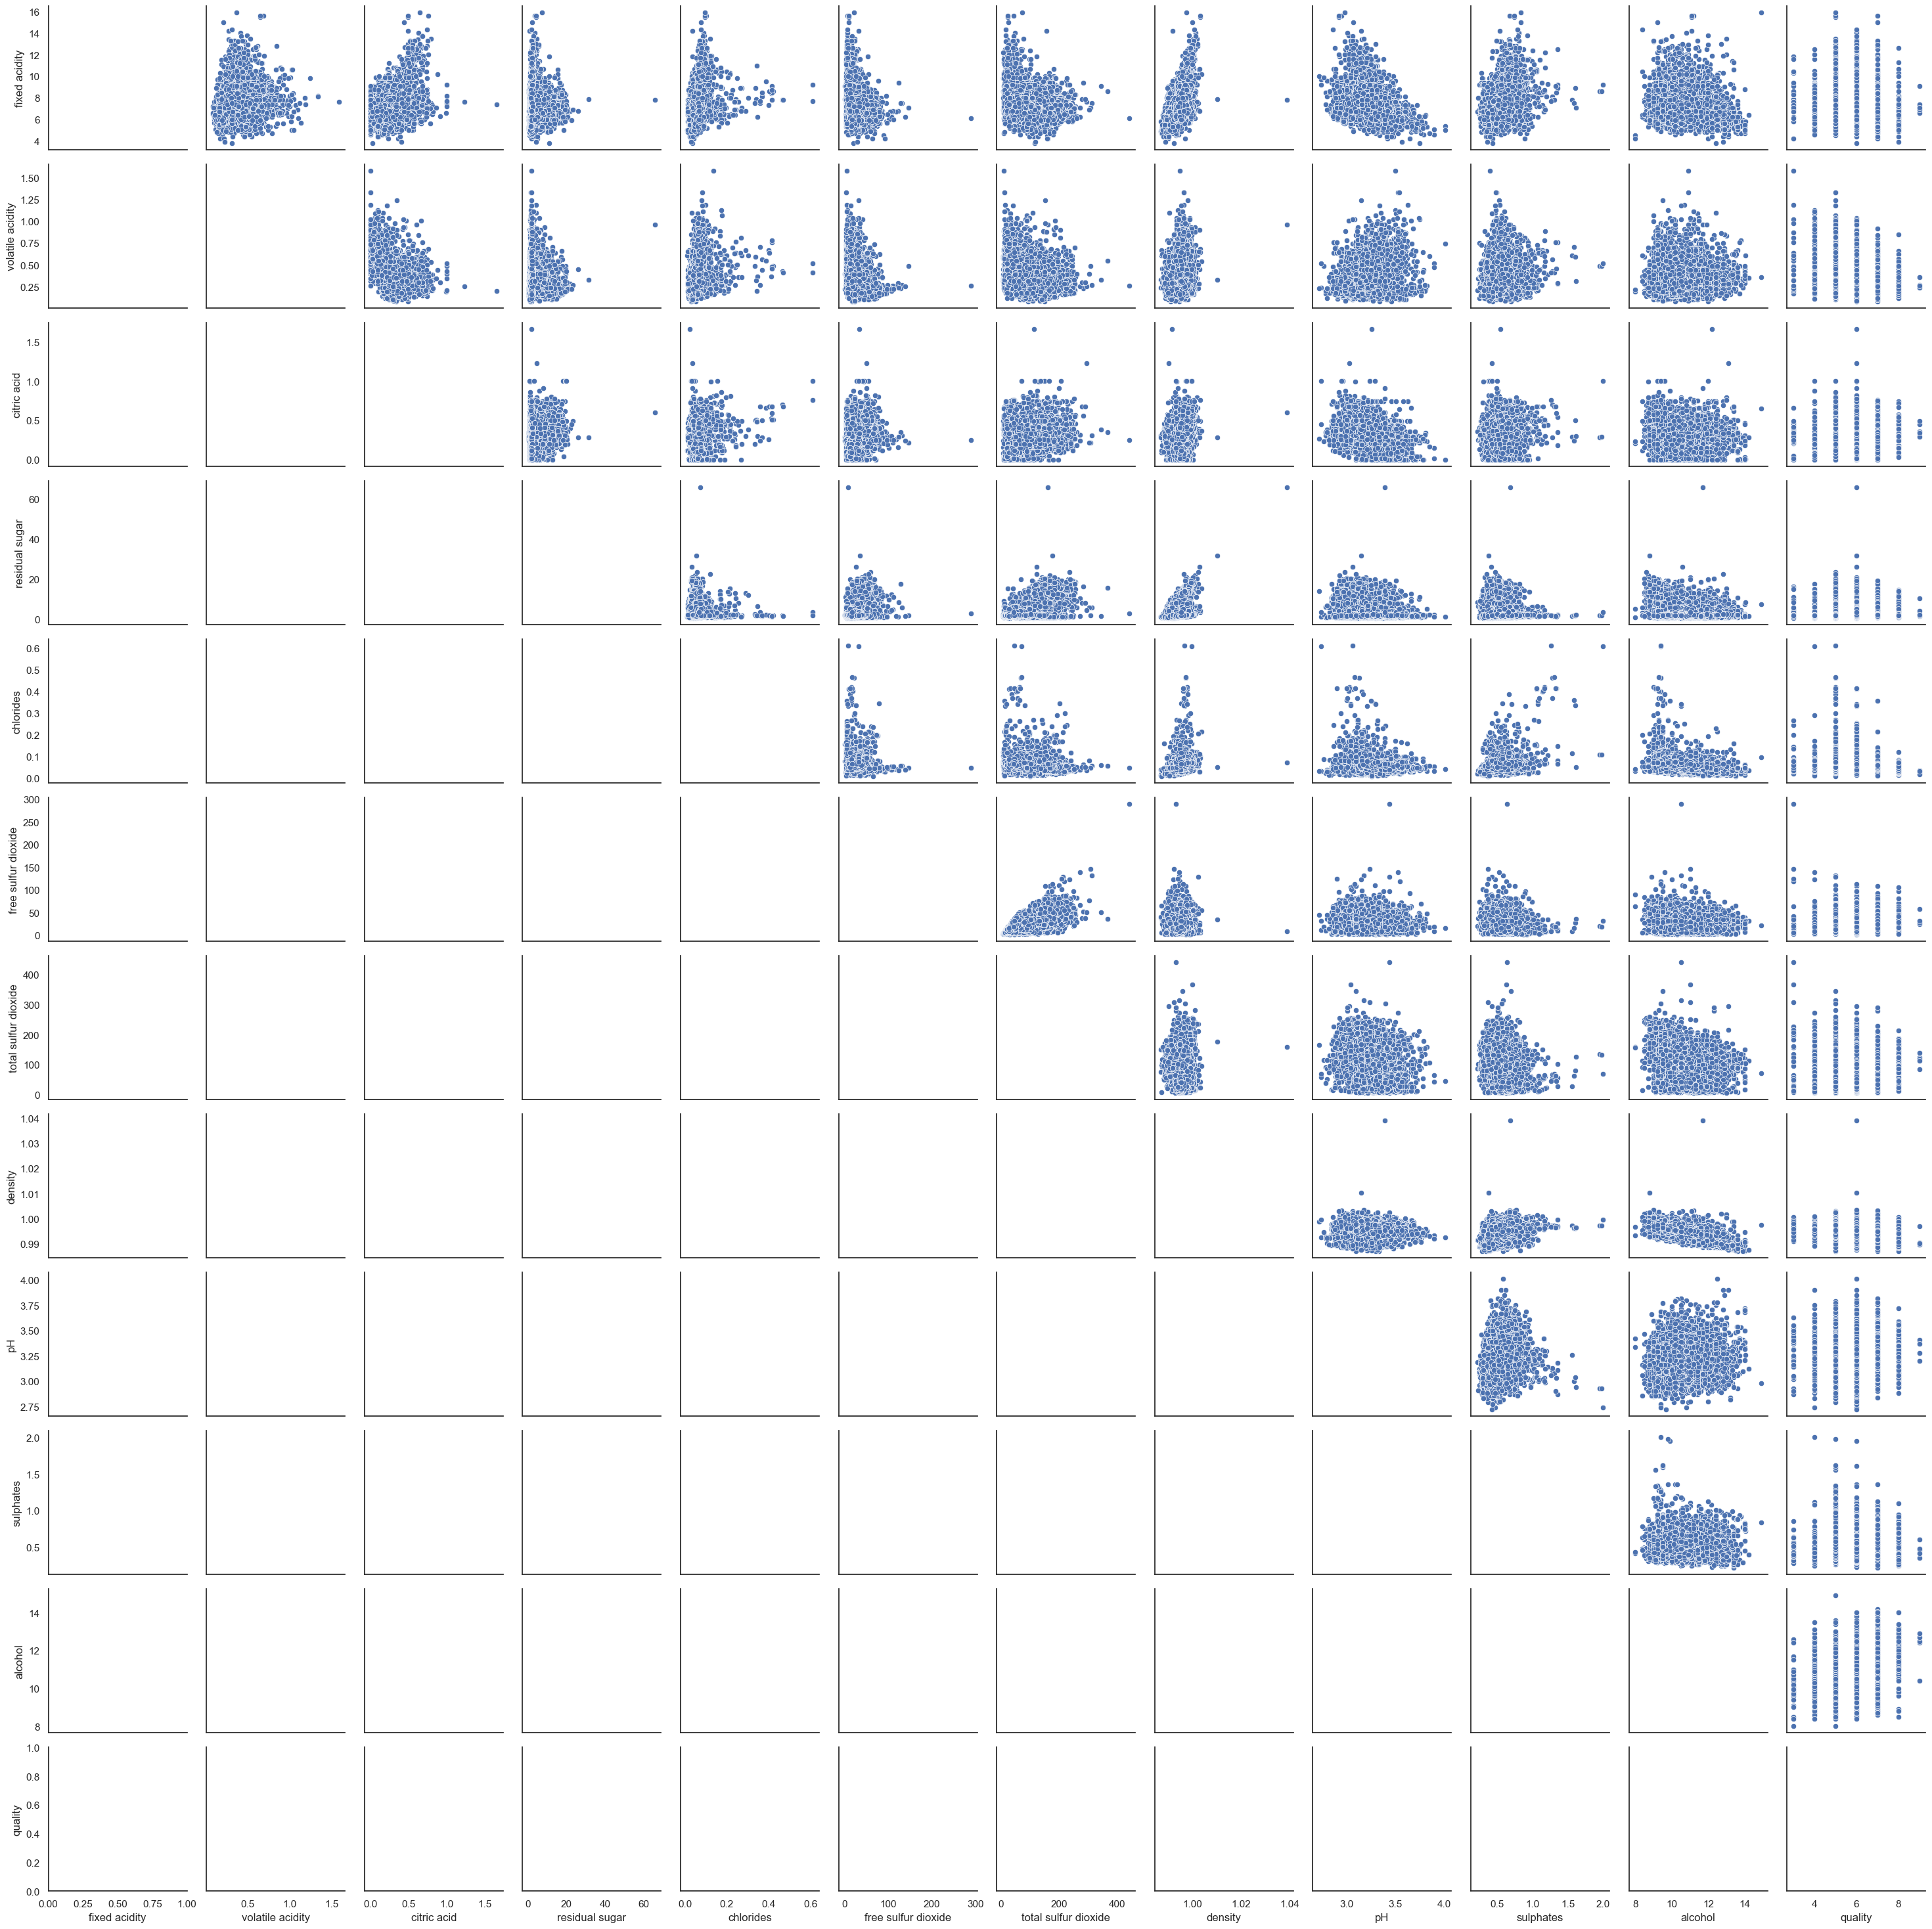

In [135]:
sns.set(style = "white")
g = sns.PairGrid(df_all, diag_sharey = False)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot, colors = "C0")
g.map_diag(sns.kdeplot, lw = 2)